---   
<img align="left" width="110"   src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg"> 

<h1 align="center">Tools and Techniques for Data Science</h1>
<h1 align="center">Course: Deep Learning</h1>

---
<h3 align="right">Muhammad Sheraz (Data Scientist)</h3>
<h1 align="center">Day26 (Batch Normalization)</h1>

  <div align="center">
      <img width="45%" src="Images/batch_norm_3.png">
      <img width="54%" src='Images/batch_norm_2.png'>
  
 
  </div>

# Batch Normalization

- Normalization technique used in deep learning to improve the training `speed` and `performance` of neural networks.
- It normalizes the input of each layer by adjusting and scaling the activations.



### How it work?

- Computes the `mean` and `variance` of each mini-batch during training.
- Normalizes the activations using the mean and variance.
- Applies `scaling` and `shifting` to the normalized activations using learned parameters (`gamma` and `beta`).
- These parameters are `learned` during training via backpropagation.


<img src='Images/batcch_work.png'>

### Benefits of Batch Normalization
- Helps alleviate issues like vanishing/exploding gradients during training.
- Allows for faster convergence by stabilizing the learning process.
- Reduces the sensitivity to the initialization of model parameters.
- Acts as a regularizer, reducing the need for other regularization techniques.

### Drawbacks of Batch Normalization
- Increases computational overhead during training due to additional computations.
- Makes the model less robust to small batches or non-i.i.d. (independent and identically distributed) data.
- Not always suitable for certain types of networks or tasks (e.g., recurrent neural networks).

### When to Use Batch Normalization?
- Typically used in feedforward neural networks, especially in deep architectures.
- Effective when training deep networks with multiple layers.
- Generally not used in certain architectures like recurrent neural networks (RNNs) due to the sequential nature of data processing.

### Implementation Details
- Batch Normalization layers are usually added after the linear transformation and before the activation function in a neural network.
- Parameters (`gamma` and `beta`) are learned during training along with other network parameters.
- During inference, batch statistics may be calculated differently (e.g., using moving averages) for stability.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Datasets/concertriccir2.csv')

In [4]:
df.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [5]:
df = df.rename(columns=({'7.003345706103683010e-01':'X'}))

In [6]:
df = df.rename(columns=({'-2.470675778972781789e-01':'Y'}))

In [7]:
df = df.rename(columns=({'0.000000000000000000e+00':'class'}))

In [8]:
df.head()

,X,Y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


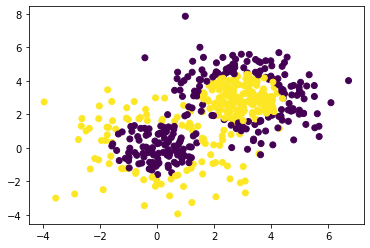

In [23]:
plt.scatter(df['X'],df['Y'],c=df['class']);

In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [12]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200


13/13 [==============================] - 3s 44ms/step - loss: 0.7001 - accuracy: 0.4662 - val_loss: 0.6932 - val_accuracy: 0.4300
Epoch 2/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6994 - accuracy: 0.5238 - val_loss: 0.6934 - val_accuracy: 0.4300
Epoch 3/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6988 - accuracy: 0.5213 - val_loss: 0.6936 - val_accuracy: 0.4300
Epoch 4/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6983 - accuracy: 0.5188 - val_loss: 0.6938 - val_accuracy: 0.4300
Epoch 5/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6979 - accuracy: 0.5188 - val_loss: 0.6941 - val_accuracy: 0.4300
Epoch 6/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6975 - accuracy: 0.5163 - val_loss: 0.6943 - val_accuracy: 0.4300
Epoch 7/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6971 - accuracy: 0.5113 - val_loss: 0.6946 - val_accuracy: 0.4300
Epoch

In [15]:
model=Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization (Batch  (None, 3)                 12        
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 batch_normalization_1 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 30 (1

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 5s 50ms/step - loss: 0.7443 - accuracy: 0.5138 - val_loss: 0.8154 - val_accuracy: 0.4500
Epoch 2/200
13/13 [==============================] - 0s 12ms/step - loss: 0.7398 - accuracy: 0.5013 - val_loss: 0.7822 - val_accuracy: 0.4100
Epoch 3/200
13/13 [==============================] - 0s 12ms/step - loss: 0.7302 - accuracy: 0.5388 - val_loss: 0.7484 - val_accuracy: 0.4100
Epoch 4/200
13/13 [==============================] - 0s 11ms/step - loss: 0.7268 - accuracy: 0.5414 - val_loss: 0.7250 - val_accuracy: 0.4200
Epoch 5/200
13/13 [==============================] - 0s 12ms/step - loss: 0.7183 - accuracy: 0.5789 - val_loss: 0.7049 - val_accuracy: 0.4000
Epoch 6/200
13/13 [==============================] - 0s 12ms/step - loss: 0.7094 - accuracy: 0.5714 - val_loss: 0.6878 - val_accuracy: 0.4900
Epoch 7/200
13/13 [==============================] - 0s 12ms/step - loss: 0.6926 - accuracy: 0.5890 - val_loss: 0.6773 - val_accuracy: 0.5100
Epoch 

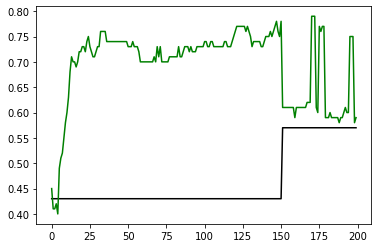

In [18]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

### Beginner Level:

1. **What is batch normalization, and why is it used in neural networks?**
   Batch normalization is a technique used to improve the training of deep neural networks by normalizing the input of each layer. It involves normalizing the activations of each layer by subtracting the batch mean and dividing by the batch standard deviation. Batch normalization helps address the internal covariate shift problem, stabilizes the training process, and accelerates convergence.

2. **Explain the concept of internal covariate shift and how batch normalization addresses it.**
   Internal covariate shift refers to the change in the distribution of network activations as the parameters of the network are updated during training. This can slow down the training process and make it difficult to optimize deep neural networks. Batch normalization addresses internal covariate shift by normalizing the activations of each layer, ensuring that they have zero mean and unit variance, which helps stabilize the training process.

3. **How does batch normalization work during training and inference phases?**
   During training, batch normalization computes the mean and standard deviation of the activations within each mini-batch and normalizes the activations using these statistics. During inference, batch normalization typically uses the running mean and running standard deviation computed during training to normalize the activations.

### Intermediate Level:

4. **Can you explain the mathematical formulation of batch normalization?**
   Batch normalization normalizes the activations of each layer by subtracting the batch mean and dividing by the batch standard deviation. Mathematically, the normalized activations \( \hat{x} \) are calculated as follows:
   \[ \hat{x} = \frac{x - \text{mean}(x)}{\sqrt{\text{var}(x) + \epsilon}} \]
   where \( x \) is the input to the layer, \( \text{mean}(x) \) is the mean of the batch, \( \text{var}(x) \) is the variance of the batch, and \( \epsilon \) is a small constant to prevent division by zero.

5. **How does batch normalization affect the optimization landscape of neural networks?**
   Batch normalization smooths the optimization landscape of neural networks by reducing the internal covariate shift and stabilizing the training process. This can lead to faster convergence, improved gradient flow, and reduced vanishing or exploding gradients, making it easier to train deep networks.

6. **Can batch normalization be applied to all layers of a neural network? If not, why?**
   Batch normalization can be applied to all layers of a neural network, including convolutional layers, fully connected layers, and recurrent layers. However, it may not always be beneficial to apply batch normalization to all layers, especially in deeper networks or in certain architectures such as generative adversarial networks (GANs), where batch normalization may interfere with the learning dynamics.

### Advanced Level:

7. **How does batch normalization interact with other regularization techniques such as dropout?**
   Batch normalization acts as a form of regularization by reducing internal covariate shift and stabilizing the training process. In some cases, batch normalization may reduce the need for other regularization techniques such as dropout. However, batch normalization and dropout can be used together synergistically to further improve the generalization performance of neural networks.

8. **What are some alternatives to batch normalization, and how do they differ from each other?**
   Some alternatives to batch normalization include layer normalization, instance normalization, and group normalization. These techniques differ in how they normalize the activations of each layer and the context in which they are applied.

9. **Can you describe any recent advancements or research trends in batch normalization or related techniques for improving training stability and convergence in neural networks?**
   Recent advancements in batch normalization include techniques such as batch renormalization, which aims to improve the stability of batch normalization during training, and adaptive normalization methods, which adaptively adjust the normalization parameters based on the data distribution or the network architecture.


### 1. **What is batch normalization, and why is it used in neural networks?**
Batch normalization is a technique used to improve the training of deep neural networks by normalizing the input of each layer. It involves normalizing the activations of each layer by subtracting the batch mean and dividing by the batch standard deviation. Batch normalization helps address the internal covariate shift problem, stabilizes the training process, and accelerates convergence.

### 2. **Explain the concept of internal covariate shift and how batch normalization addresses it.**
Internal covariate shift refers to the change in the distribution of network activations as the parameters of the network are updated during training. This can slow down the training process and make it difficult to optimize deep neural networks. Batch normalization addresses internal covariate shift by normalizing the activations of each layer, ensuring that they have zero mean and unit variance, which helps stabilize the training process.

### 3. **How does batch normalization work during training and inference phases?**
During training, batch normalization computes the mean and standard deviation of the activations within each mini-batch and normalizes the activations using these statistics. During inference, batch normalization typically uses the running mean and running standard deviation computed during training to normalize the activations.

### 4. **What are the key benefits of using batch normalization?**
Some key benefits of batch normalization include:
- Accelerated training: Batch normalization helps stabilize the training process, allowing for faster convergence and reduced training time.
- Improved generalization: Batch normalization acts as a form of regularization, reducing the need for other regularization techniques such as dropout.
- Robustness to initialization: Batch normalization reduces the sensitivity of neural networks to the choice of initialization parameters, making it easier to train deep networks.

### 5. **What are some potential drawbacks or limitations of batch normalization?**
Some potential drawbacks or limitations of batch normalization include:
- Increased memory usage: Batch normalization requires storing additional statistics for each layer, increasing the memory footprint of the model.
- Reduced effectiveness with small batch sizes: Batch normalization may not work well with very small batch sizes, as the batch statistics may be less representative of the true population statistics.
- Dependency on mini-batch statistics: Batch normalization relies on mini-batch statistics, which may introduce noise and instability, especially in the early stages of training.

### 6. **How does batch normalization affect the optimization landscape of neural networks?**
Batch normalization smooths the optimization landscape of neural networks by reducing the internal covariate shift and stabilizing the training process. This can lead to faster convergence, improved gradient flow, and reduced vanishing or exploding gradients, making it easier to train deep networks.

### 7. **Can batch normalization be applied to all layers of a neural network? If not, why?**
Batch normalization can be applied to all layers of a neural network, including convolutional layers, fully connected layers, and recurrent layers. However, it may not always be beneficial to apply batch normalization to all layers, especially in deeper networks or in certain architectures such as generative adversarial networks (GANs), where batch normalization may interfere with the learning dynamics.

### 8. **How does batch normalization interact with other regularization techniques such as dropout?**
Batch normalization acts as a form of regularization by reducing internal covariate shift and stabilizing the training process. In some cases, batch normalization may reduce the need for other regularization techniques such as dropout. However, batch normalization and dropout can be used together synergistically to further improve the generalization performance of neural networks.

### 9. **What are some alternatives to batch normalization?**
Some alternatives to batch normalization include:
- Layer normalization: Normalizes the activations of each layer across the entire mini-batch, rather than separately for each feature.
- Instance normalization: Normalizes the activations of each channel across spatial locations within each sample, rather than across the entire mini-batch.
- Group normalization: Divides the channels of each sample into groups and normalizes the activations within each group separately.

### 10. **How does batch normalization affect the distribution of gradients during backpropagation?**
Batch normalization can help mitigate the vanishing and exploding gradient problem by stabilizing the training process and improving gradient flow. By normalizing the activations of each layer, batch normalization ensures that gradients are more consistent and less likely to vanish or explode as they propagate through the network.

